## MLFlow Tracking with Python
> - Tested on macOS Monterey version 12.1 Macbook Pro, 2.2 GHz Quad-Core Intel Core i7, Memory 16GB DDR3

#### 1.0 MLFlow Tracking

> 1. Offers API & UI for logging parameters, code versions, metrics, and artifacts when running your code and visualizing results. You can log result to local file system or databases.  Multiple developers can use the tracking server to compare multiple experiments results with their peers 

> 2. Record experiments for logging parameters, code versions, metrics, and artifacts

> 3. Visualize experiment result via MLflow UI 

> 4. Multi-user sharing environment

##### Main Components 
> - ***Artifacts***:   Result artifacts in scikit-learn, parquet, and png format
> - ***Parameters***:  key-value pair 
> - ***Metrics***:     numeric key-value pair and live metric update during the run and visualize via mlflow UI

In [11]:
import os
import sys
import shutil

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [12]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

import mlflow as mf

#### Tracking server URI

In [13]:
!rm -rf mlruns/.trash/*

zsh:1: no matches found: mlruns/.trash/*


In [14]:
mf.set_tracking_uri('http://127.0.0.1:5000')

In [15]:
experiment_id = mf.set_experiment("test")

In [16]:
mf.start_run()

mf.log_param('flower boy', 5.7)
mf.log_param('macho girl', 5.8)

for i in range(10):
    mf.log_metric('accuracy', i)

mf.end_run()

In [17]:
def fastcampus(fg_color: str, bg_color: str, text: str, folder_path: str):
    x  = np.linspace(-10, 10, num=8000)
    y1 = np.sqrt(1-(abs(x)-1)**2)
    y2 = -3*np.sqrt(1-(abs(x)/2)**0.5)

    plt.axis('off')
    plt.fill_between(x, y1, color=bg_color)
    plt.fill_between(x, y2, color=bg_color)
    plt.xlim([-3.0, 3.0])
    plt.text(0, -0.3, text, fontsize=20, fontweight='bold', color=fg_color, horizontalalignment='center', verticalalignment='center')
    plt.savefig('{0}/{3}.png'.format(folder_path, fg_color, bg_color, text))

    return np.random.randint(100)

In [18]:
mf.set_tracking_uri('http://127.0.0.1:5000')

In [19]:
experiment_id = mf.set_experiment("ILoveFastCampus")

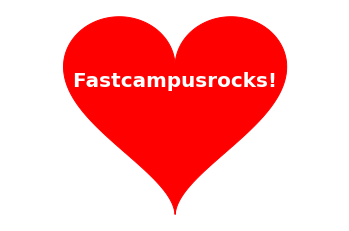

In [20]:
with mf.start_run() as run:

    fg_color = 'white'
    bg_color = 'red'
    text     = 'Fastcampusrocks!'
    folder   = '../pics/'
    
    mf.log_param("foreground color", fg_color)
    mf.log_param("background color", bg_color)
    mf.log_param("text", text)
    mf.set_tag('red heart', 'fast campus')

    os.makedirs(folder, exist_ok=True)
    rating = fastcampus(fg_color, bg_color, text, folder)
    with open("{0}fastcampus_log.txt".format(folder), "w") as f:f.write("I love fastcampus")
        
    mf.log_metric('rating', rating)
    mf.log_artifacts(folder)
    shutil.rmtree(folder)